In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.impute import SimpleImputer


from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

# 🏢 Business Understanding

**Latar Belakang:**
Perusahaan e-commerce mengalami masalah *customer churn* (pelanggan berhenti menggunakan layanan). Jika churn tinggi, perusahaan bisa kehilangan pendapatan dan biaya akuisisi pelanggan baru jadi lebih tinggi.

**Stakeholder:**
- **Tim Marketing & Retention:** Menggunakan model ini untuk mengidentifikasi pelanggan yang berisiko churn dan memberi promo.
- **Manajemen Perusahaan:** Memantau tingkat churn sebagai indikator kesehatan bisnis.

**Masalah:**
- Banyak pelanggan yang tiba-tiba tidak melakukan pembelian lagi (churn) tanpa diketahui penyebab pastinya.
- Perusahaan belum punya sistem untuk mendeteksi dini pelanggan yang akan churn.

**Tujuan:**
- Membangun model machine learning untuk memprediksi pelanggan yang akan churn.
- Model ini akan membantu tim marketing dalam membuat strategi retensi pelanggan.

**Definisi Dataset:**
- Dataset berisi data historis pelanggan e-commerce.  
- Tiap baris mewakili satu pelanggan.

# Data Exploration



In [186]:
path = '/Users/muhamadwildantrisianly/data_ecommerce_customer_churn.csv'
df = pd.read_csv(path)

In [187]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [188]:
df.shape

(3941, 11)

In [189]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [190]:
df.isna().sum() / len(df) * 100


Tenure                      4.922608
WarehouseToHome             4.288252
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.404720
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

In [191]:
# df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
# df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
# # df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [192]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


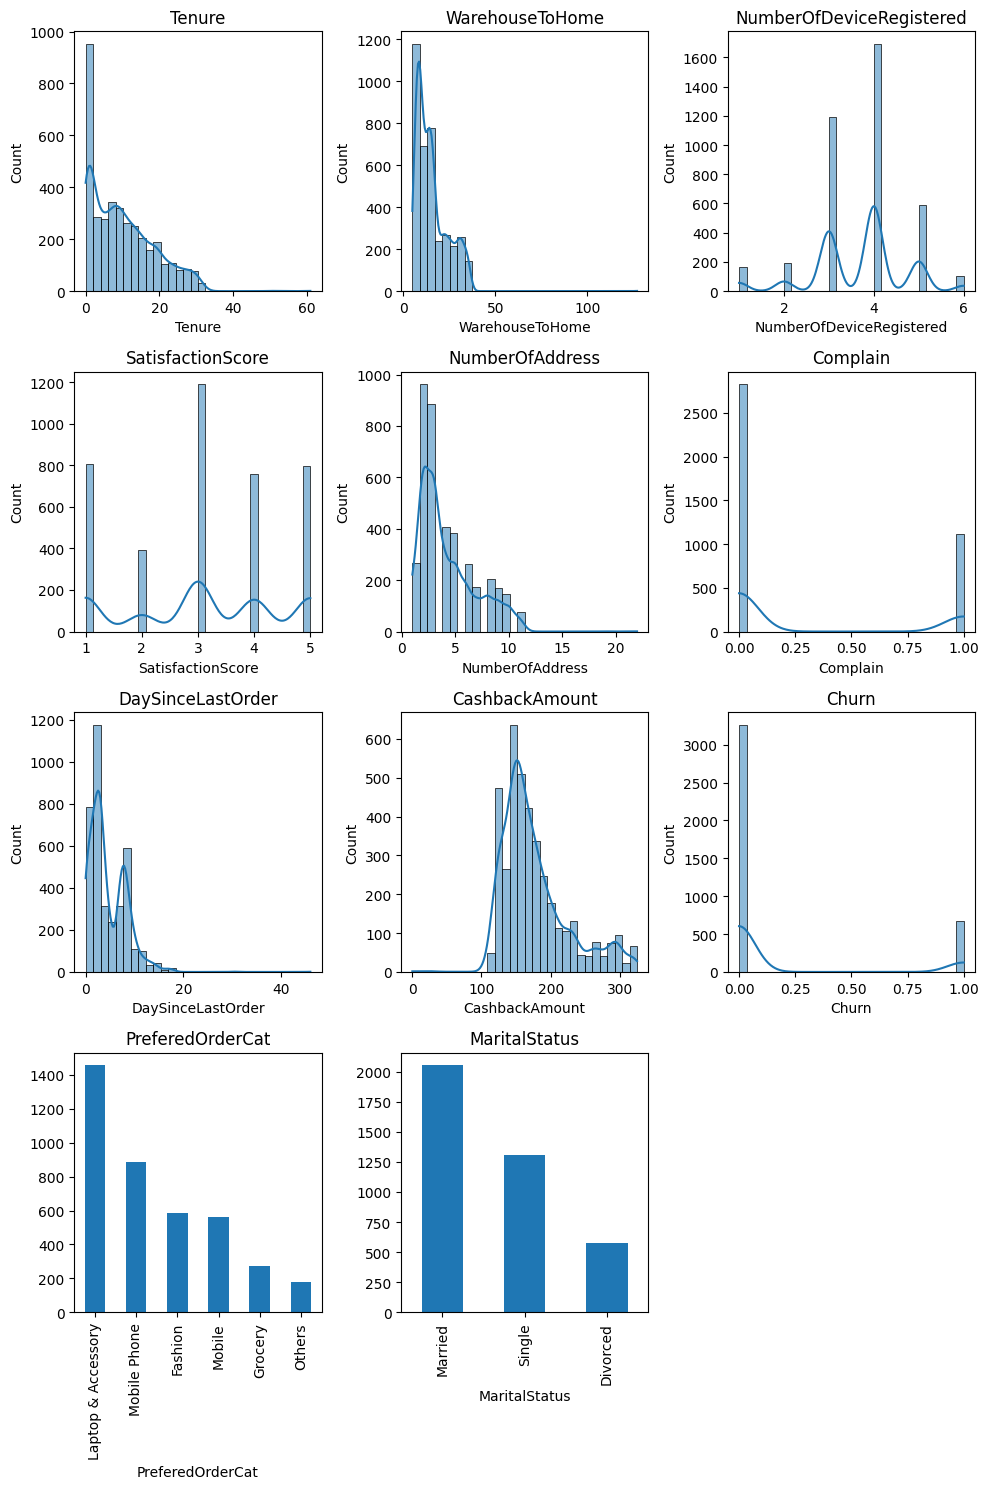

In [193]:
# Create a figure and set its size
plt.figure(figsize=(10, 15))

# Separating columns by dtype
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
object_columns = df.select_dtypes(include=['object']).columns

# Plot numeric columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

# Plot object columns
for j, column in enumerate(object_columns, 1):
    plt.subplot(4, 3, len(numeric_columns) + j)
    df[column].value_counts().plot(kind="bar")
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

- bisa dilihat jika data yang churn dan tidak churn ituu imbalance dan perbandingan nya kurang lebih 1:7 

# Preprocessing

In [194]:
X = df.drop(columns='Churn')
y= df['Churn']

In [195]:
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

In [197]:
# ===== 5. PREPROCESSING PIPELINE =====
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()) #tahan terhadap outlier
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)


In [198]:
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['PreferedOrderCat', 'MaritalStatus'])],
                  verbose_feature_names_out=False)

### 🔧 Preprocessing
- **Numerik:**
  - Imputasi nilai kosong dengan **median** untuk mengurangi pengaruh outlier ekstrem.
  - Scaling menggunakan **RobustScaler** agar skala data tidak terdistorsi oleh outlier.
- **Kategorikal:**
  - Imputasi nilai kosong dengan **modus**.
  - Encoding menggunakan **OneHotEncoder** agar bisa diproses oleh model machine learning.


# Cross Validation

In [199]:
#  hitung scale_pos_weight 
pos = int(y_train.sum())
neg = int(len(y_train) - pos)
spw_base = (neg / pos) if pos > 0 else 1.0

from xgboost import XGBClassifier   # impor model XGBoost (gradien boosting untuk klasifikasi)

models = {                                  # kamus: nama_model → objek estimator
    "LogisticRegression": LogisticRegression(
        max_iter=1000,                      # batas iterasi agar pasti konvergen
        class_weight="balanced",            # otomatis menimbang kelas minoritas lebih besar
        random_state=0                      # seed supaya hasil re-producible
    ),
    "DecisionTree": DecisionTreeClassifier(
        max_depth=None,                     # kedalaman bebas (akan dibatasi oleh parameter lain/impurity)
        min_samples_split=8,                # node butuh ≥8 sampel untuk di-split (kurangi overfit)
        class_weight="balanced",            # penimbangan kelas untuk imbalanced
        random_state=0
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,                   # jumlah pohon 
        class_weight="balanced",            # bobot kelas saat membangun tiap pohon
        random_state=0
    ),
    "XGBoost": XGBClassifier(               # model boosting berbasis pohon
        n_estimators=400,                   # banyaknya boosting rounds (jumlah pohon)
        max_depth=5,                        # kedalaman pohon dasar (kontrol kompleksitas)
        learning_rate=0.05,                 # langkah learning (lebih kecil -> butuh lebih banyak estimators)
        subsample=0.8,                      # sampling baris per pohon (regularisasi)
        colsample_bytree=0.8,               # sampling kolom per pohon (regularisasi)
        reg_lambda=1.0,                     # L2 regularization untuk bobot daun
        eval_metric="aucpr",                # metrik INTERNAL XGB (PR-AUC) cocok untuk kelas imbalanced
        scale_pos_weight=spw_base,          # memakai scale pos weight karena membantu untuk menangani kelas imbalance
        tree_method="hist",                 # algoritma pohon cepat di CPU
        random_state=0
    )
}


In [200]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ["roc_auc", "average_precision", "precision", "recall", "f1"]


In [201]:
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ["roc_auc", "average_precision", "precision", "recall", "f1"]

rows = []
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    scores = cross_validate(
        pipe, X_train, y_train,
        cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
    )
    rows.append({
        "model": name,
        "roc_auc": float(np.mean(scores["test_roc_auc"])),
        "pr_auc": float(np.mean(scores["test_average_precision"])),
        "precision": float(np.mean(scores["test_precision"])),
        "recall": float(np.mean(scores["test_recall"])),
        "f1": float(np.mean(scores["test_f1"]))
    })

df_cv = (pd.DataFrame(rows)
         .set_index("model")
         .sort_values(by=["pr_auc","roc_auc"], ascending=False)
         .round(4))
print(df_cv)


                    roc_auc  pr_auc  precision  recall      f1
model                                                         
RandomForest         0.9558  0.8405     0.8430  0.6235  0.7153
XGBoost              0.9473  0.8309     0.7530  0.8016  0.7751
LogisticRegression   0.8801  0.6781     0.4499  0.8145  0.5796
DecisionTree         0.8526  0.6247     0.5912  0.7644  0.6655


Analisis

**- RandomForest**
ROC AUC & PR AUC tertinggi (bagus untuk overall ranking), Precision tinggi -> rediksi churn akurat , Tapi recall rendah -> banyak pelanggan churn yang lolos tidak terdeteksi

**- XGBoost**
Recall tertinggi kedua (0.80), precision cukup tinggi (0.75), F1 tertinggi -> paling seimbang , ROC AUC & PR AUC juga tinggi -> performa keseluruhan stabil
Cocok untuk menangkap lebih banyak churn tanpa terlalu banyak false positive

**LogisticRegression**
Recall tinggi (0.81) tapi precision sangat rendah (0.44) → terlalu banyak false positive

**DecisionTree**
Semua skor lebih rendah dibanding RandomForest & XGBoost

In [202]:
baseline_xgb = XGBClassifier(
    objective="binary:logistic", eval_metric="aucpr",
    tree_method="hist", random_state=0, n_jobs=-1
)

baseline_pipe = Pipeline([
    ("prep", preprocess),   # langkah preprocessing selalu duluan
    ("clf", baseline_xgb)   # model baseline (belum tuning)
])

In [203]:
from sklearn.model_selection import cross_validate, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_validate(baseline_pipe, X_train, y_train,
                        scoring="average_precision", cv=cv, n_jobs=-1)
print("Baseline PR-AUC (CV):", scores["test_score"].mean())


Baseline PR-AUC (CV): 0.8381515844742864


In [204]:
baseline_fitted=baseline_pipe.fit(X_train, y_train)  

# Hyperparameter Tuning


In [205]:
# pastikan label biner 0/1 untuk konsistensi metrik
y_train = pd.Series(y_train).astype(int)             # ubah ke int (0/1) bila sebelumnya bool/str
y_test  = pd.Series(y_test).astype(int)              # sama untuk test

In [206]:
pos = int(y_train.sum())                             # jumlah kelas positif (churn=1) di TRAIN
neg = int(len(y_train) - pos)                        # jumlah kelas negatif (non-churn=0) di TRAIN
spw_base = (neg/pos) if pos > 0 else 1.0            # rasio neg/pos (rekomendasi untuk XGB), fallback 1.0
spw_grid  = [max(1.0, spw_base*g) for g in          # grid kecil di sekitar rasio untuk dituning
             (0.5, 0.75, 1.0, 1.25, 1.5)]
print(f"pos={pos}, neg={neg}, scale_pos_weight≈{spw_base:.2f}")  # tampilkan ringkasannya

pos=539, neg=2613, scale_pos_weight≈4.85


In [207]:
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_predict
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
xgb_base = XGBClassifier(                                # definisi model dasar XGB
    objective="binary:logistic",                         # keluaran berupa probabilitas
    eval_metric="aucpr",                                 # metrik internal XGB (selaras untuk imbalanced)
    tree_method="hist",                                  # implementasi cepat di CPU
    random_state=0,                                      # seed untuk reprodusibilitas
    n_jobs=-1                                            # gunakan semua core CPU
)

pipe_xgb = Pipeline([                                    # pipeline: preprocessing → model
    ("prep", preprocess),                                # step 1: transform fitur (impute, OHE, scale, dll.)
    ("clf", xgb_base)                                    # step 2: model XGB
])
pipe_xgb



Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=0, ...))])

In [208]:
param_xgb = {                                            # ruang hyperparameter XGB untuk randomized search
    "clf__n_estimators": randint(400, 1200),             # jumlah pohon (rounds)
    "clf__learning_rate": loguniform(1e-3, 3e-1),        # laju belajar (skala log)
    "clf__max_depth": randint(3, 10),                    # kedalaman pohon dasar
    "clf__min_child_weight": loguniform(0.5, 10),        # regularisasi node daun
    "clf__subsample": uniform(0.6, 0.4),                 # sampling baris per pohon (0.6..1.0)
    "clf__colsample_bytree": uniform(0.6, 0.4),          # sampling fitur per pohon (0.6..1.0)
    "clf__gamma": loguniform(1e-8, 10),                  # penalti untuk split baru
    "clf__reg_lambda": loguniform(1e-2, 10),             # regularisasi L2
    "clf__reg_alpha": loguniform(1e-3, 10),              # regularisasi L1
    "clf__scale_pos_weight": spw_grid                    # kunci untuk imbalanced (dituning sekitar rasio)
}

rs_xgb = RandomizedSearchCV(                             # inisialisasi randomized search
    estimator=pipe_xgb,                                  # pipeline yang akan di-tuning
    param_distributions=param_xgb,                       # ruang hyperparameter di atas
    n_iter=60,                                           # jumlah sampling (boleh turunkan 30 untuk cepat)
    scoring="average_precision",                         # optimalkan PR-AUC (Average Precision)
    cv=cv,                                               # skema CV 5-fold
    n_jobs=-1,                                           # paralelkan semua core
    verbose=1,                                           # tampilkan progres
    refit=True,                                          # setelah selesai, refit dengan params terbaik ke seluruh TRAIN
    random_state=0                         # seed untuk reprodusibilitas
)

rs_xgb.fit(X_train, y_train)                             # jalankan tuning di TRAIN
print("Best XGB PR-AUC (CV):", round(rs_xgb.best_score_, 4))   # tampilkan skor CV terbaik (PR-AUC)
print("Best XGB params:")                                # tampilkan set hyperparameter terbaik
for k, v in rs_xgb.best_params_.items():
    print(" ", k, ":", v)

best_xgb = rs_xgb.best_estimator_                        # simpan pipeline terbaik (sudah ter-refit ke seluruh TRAIN)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best XGB PR-AUC (CV): 0.8535
Best XGB params:
  clf__colsample_bytree : 0.6575317462724224
  clf__gamma : 0.007001115913126967
  clf__learning_rate : 0.021663181292177026
  clf__max_depth : 8
  clf__min_child_weight : 1.6212606355375372
  clf__n_estimators : 775
  clf__reg_alpha : 0.0043599375491853954
  clf__reg_lambda : 0.024447643966464063
  clf__scale_pos_weight : 3.6358998144712427
  clf__subsample : 0.8175223800309306


In [209]:
best_xgb

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute...
                               interaction_constraints=None,
                               learning_rate=np.float64(0.021663181292177026),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=np.float64(1.6212606355375372),
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=775, n_jobs=-1,
                               num_parallel_tree=None, random_state=0, ...))])

# Evaluation Test

TEST PR-AUC  = 0.9203
TEST ROC-AUC = 0.9688

=== Classification Report @thr=0.50 ===
              precision    recall  f1-score   support

           0     0.9679    0.9679    0.9679       654
           1     0.8444    0.8444    0.8444       135

    accuracy                         0.9468       789
   macro avg     0.9062    0.9062    0.9062       789
weighted avg     0.9468    0.9468    0.9468       789



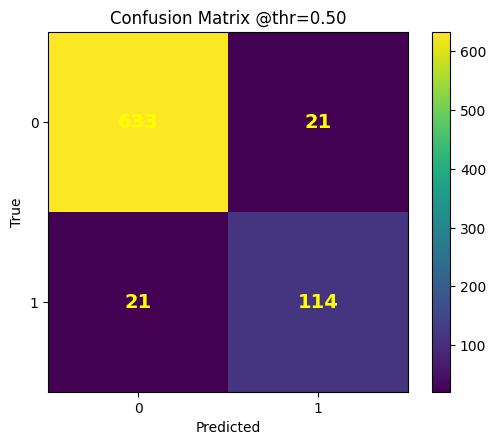

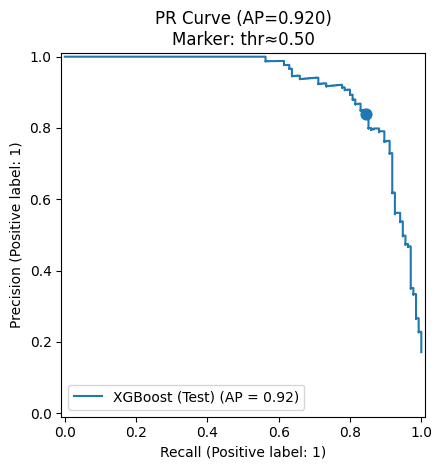

In [210]:
# === Final evaluation @ threshold 0.50 ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score,
                             PrecisionRecallDisplay, precision_recall_curve)

# pastikan y_test biner 0/1
y_test = pd.Series(y_test).astype(int)

# ambil pipeline terbaik hasil tuning (rs_xgb)
best_xgb = rs_xgb.best_estimator_

# fit ulang ke seluruh TRAIN (aman walau rs_xgb sudah refit)
best_fitted = clone(best_xgb).fit(X_train, y_train)

# probabilitas & prediksi @ thr=0.50
proba_test = best_fitted.predict_proba(X_test)[:, 1]
y_pred     = (proba_test >= 0.50).astype(int)

# metrik threshold-agnostic (global)
print(f"TEST PR-AUC  = {average_precision_score(y_test, proba_test):.4f}")
print(f"TEST ROC-AUC = {roc_auc_score(y_test, proba_test):.4f}")

# metrik threshold-dependent @0.50
print("\n=== Classification Report @thr=0.50 ===")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(5.5,4.5))
plt.imshow(cm, cmap="viridis")
plt.title("Confusion Matrix @thr=0.50"); plt.xlabel("Predicted"); plt.ylabel("True")
for i in range(2):
    for j in range(2):
        plt.text(j, i, int(cm[i, j]), ha="center", va="center",
                 color="yellow", fontsize=14, fontweight="bold")
plt.xticks([0,1], ["0","1"]); plt.yticks([0,1], ["0","1"])
plt.colorbar(); plt.tight_layout(); plt.show()

# Precision–Recall curve + penanda titik thr=0.50 (opsional)
prec, rec, thr = precision_recall_curve(y_test, proba_test)
disp = PrecisionRecallDisplay.from_predictions(y_test, proba_test, name="XGBoost (Test)")
# tandai titik terdekat ke 0.50
if len(thr) > 0:
    import numpy as np
    i = int(np.argmin(np.abs(thr - 0.50)))
    plt.scatter(rec[i], prec[i], s=60)
    plt.title(f"PR Curve (AP={average_precision_score(y_test, proba_test):.3f})\nMarker: thr≈0.50")
plt.tight_layout(); plt.show()


In [211]:
def show_side_by_side(y_true, y_pred_A, y_pred_B, titleA, titleB):
    cm_A = confusion_matrix(y_true, y_pred_A, labels=[0,1])
    cm_B = confusion_matrix(y_true, y_pred_B, labels=[0,1])
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    for ax, cm, ttl in [(axes[0], cm_A, titleA), (axes[1], cm_B, titleB)]:
        im = ax.imshow(cm, cmap="viridis")
        ax.set_title(ttl, fontsize=16, weight="bold", pad=12)
        ax.set_xlabel("Predicted label"); ax.set_ylabel("True label")
        ax.set_xticks([0,1]); ax.set_yticks([0,1])
        for i in range(2):
            for j in range(2):
                ax.text(j, i, int(cm[i, j]), ha="center", va="center",
                        color="yellow", fontsize=18, weight="bold")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

=== GLOBAL METRICS (Test, tanpa threshold) ===
Baseline  : PR-AUC=0.8997 | ROC-AUC=0.9625
Tuned XGB : PR-AUC=0.9203 | ROC-AUC=0.9688

=== Befor Tuned XGB @0.50 ===
              precision    recall  f1-score   support

           0     0.9621    0.9709    0.9665       654
           1     0.8527    0.8148    0.8333       135

    accuracy                         0.9442       789
   macro avg     0.9074    0.8929    0.8999       789
weighted avg     0.9434    0.9442    0.9437       789

=== TUNED XGB @0.50 ===
              precision    recall  f1-score   support

           0     0.9679    0.9679    0.9679       654
           1     0.8444    0.8444    0.8444       135

    accuracy                         0.9468       789
   macro avg     0.9062    0.9062    0.9062       789
weighted avg     0.9468    0.9468    0.9468       789



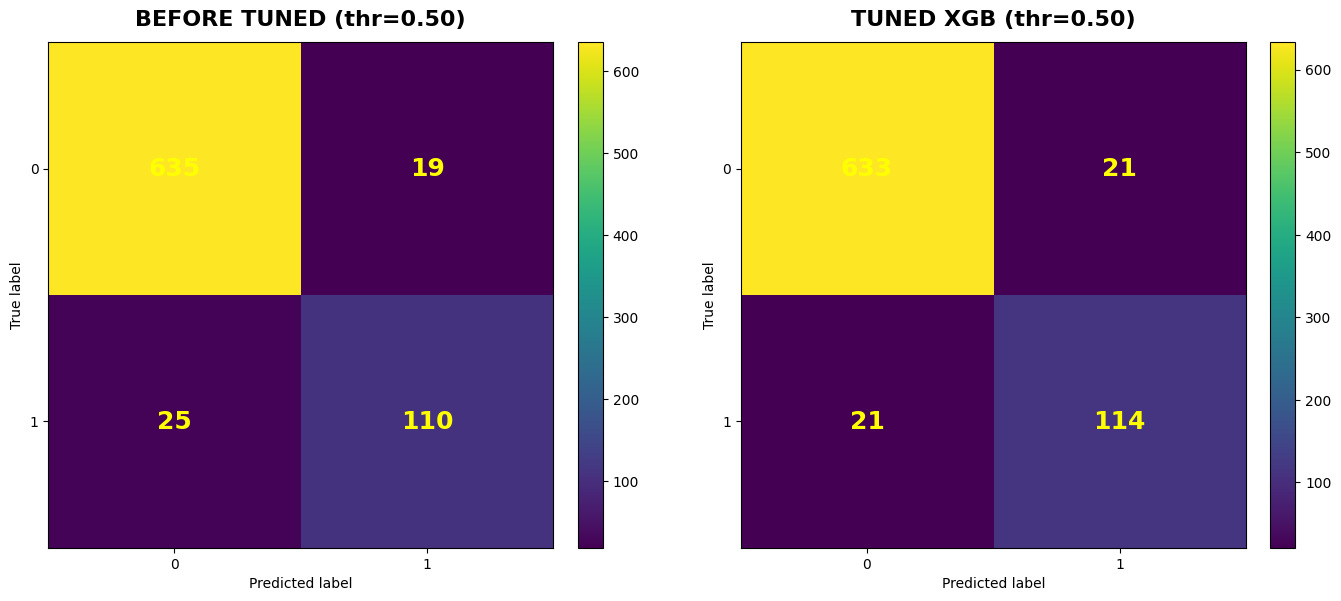

In [212]:
# ============================================
# 4) BAGIAN A — EFEK TUNING MODEL (threshold SAMA = 0.50)
# ============================================
THR_SAME = 0.50

proba_base = baseline_fitted.predict_proba(X_test)[:, 1]          # proba baseline
proba_best = best_xgb.predict_proba(X_test)[:, 1]               # proba model tuned

y_base_050 = (proba_base >= THR_SAME).astype(int)                  # pred @0.50
y_best_050 = (proba_best >= THR_SAME).astype(int)                  # pred @0.50

print("=== GLOBAL METRICS (Test, tanpa threshold) ===")            # cek kualitas model murni
print(f"Baseline  : PR-AUC={average_precision_score(y_test, proba_base):.4f} | ROC-AUC={roc_auc_score(y_test, proba_base):.4f}")
print(f"Tuned XGB : PR-AUC={average_precision_score(y_test, proba_best):.4f} | ROC-AUC={roc_auc_score(y_test, proba_best):.4f}")

print("\n=== Befor Tuned XGB @0.50 ===")
print(classification_report(y_test, y_base_050, digits=4))
print("=== TUNED XGB @0.50 ===")
print(classification_report(y_test, y_best_050, digits=4))

show_side_by_side(y_test, y_base_050, y_best_050,
                  f"BEFORE TUNED (thr={THR_SAME:.2f})",
                  f"TUNED XGB (thr={THR_SAME:.2f})")


- Setelah tuning, model XGBoost menunjukkan performa yang lebih baik secara keseluruhan.

- Nilai recall meningkat (dari 0.8148 → 0.8444) yang berarti model lebih banyak mendeteksi pelanggan yang benar-benar churn — ini sesuai dengan kebutuhan bisnis (mengurangi kehilangan pelanggan).

- Nilai F1-score dan accuracy juga naik menandakan peningkatan keseimbangan antara precision dan recall.

- Walaupun precision turun sedikit, hal ini masih dapat diterima karena peningkatan recall lebih penting dalam konteks churn.

- Jumlah False Negative turun (25 → 21) yang berarti semakin sedikit pelanggan churn yang lolos dari deteksi.

- Model yang sudah di-tuning ini lebih layak digunakan untuk prediksi churn, karena memberikan deteksi churn yang lebih sensitif tanpa mengorbankan akurasi secara signifikan.

# Feature Importance


Top-20 feature importances:


,feature,importance
5,Complain,0.159824
0,Tenure,0.140228
9,PreferedOrderCat_Grocery,0.100964
10,PreferedOrderCat_Laptop & Accessory,0.058718
8,PreferedOrderCat_Fashion,0.051310
13,PreferedOrderCat_Others,0.047344
6,DaySinceLastOrder,0.045357
16,MaritalStatus_Single,0.044315
11,PreferedOrderCat_Mobile,0.043610
3,SatisfactionScore,0.043470


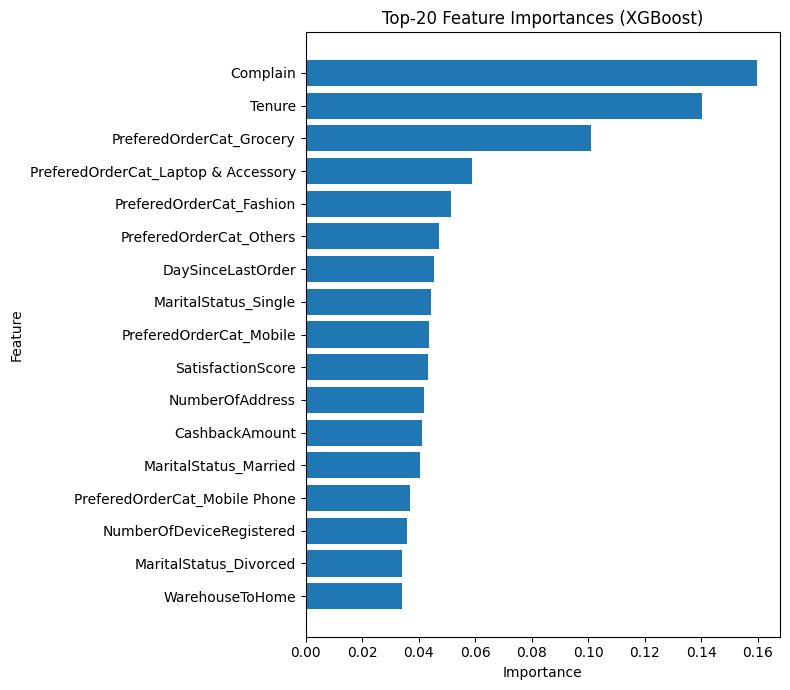

In [213]:

# nama fitur setelah preprocess
feat_names = best_fitted.named_steps["prep"].get_feature_names_out()

# importance dari model
importances = getattr(best_fitted.named_steps["clf"], "feature_importances_", None)

if importances is None:
    print("Model tidak menyediakan .feature_importances_.")
else:
    fi = (pd.DataFrame({"feature": feat_names, "importance": importances})
            .sort_values("importance", ascending=False))
    topN = 20  # ubah sesuai kebutuhan
    print(f"\nTop-{topN} feature importances:")
    display(fi.head(topN))

    # bar chart
    top = fi.head(topN).iloc[::-1]  # balik untuk barh dari bawah ke atas
    plt.figure(figsize=(8, 7))
    plt.barh(top["feature"], top["importance"])
    plt.title(f"Top-{topN} Feature Importances (XGBoost)")
    plt.xlabel("Importance"); plt.ylabel("Feature")
    plt.tight_layout(); plt.show()


## 📌 Feature Importance & Business Insight

Model XGBoost menunjukkan bahwa beberapa fitur paling berpengaruh terhadap prediksi churn adalah:

- **`Complain`** — Pelanggan yang pernah mengajukan keluhan (komplain) memiliki peluang churn paling tinggi. Hal ini menunjukkan bahwa pengalaman negatif menjadi sinyal kuat pelanggan akan pergi.
- **`Tenure`** — Pelanggan dengan masa aktif yang masih pendek cenderung lebih mudah churn dibanding pelanggan lama. Ini berarti pelanggan baru perlu mendapat perhatian khusus agar tetap loyal.
- **`PreferedOrderCat_*`** — Jenis produk terakhir yang dibeli (misalnya `Grocery`, `Laptop & Accessory`, `Fashion`) turut memengaruhi peluang churn. Beberapa kategori mungkin memiliki pola repeat order rendah, sehingga pelanggan lebih rentan churn.
- **`DaySinceLastOrder`** — Semakin lama sejak terakhir kali belanja, semakin besar kemungkinan pelanggan churn.
- **`SatisfactionScore` dan `CashbackAmount`** — Skor kepuasan rendah dan jumlah cashback kecil cenderung meningkatkan risiko churn.
- **Fitur lain seperti `NumberOfDeviceRegistered`, `NumberOfAddress`, dan `WarehouseToHome`** memberikan kontribusi kecil, artinya faktor logistik/aktivitas akun tidak sepenting pengalaman pelanggan.

💡 **Implikasi bisnis:**
- Tim marketing dapat memprioritaskan pelanggan yang:
  - Baru bergabung (**tenure rendah**),
  - Pernah melakukan **komplain**, atau
  - Sudah lama tidak belanja (**day since last order tinggi**)
- Pelanggan dalam kelompok ini dapat diberikan:
  - Program retensi khusus (diskon, loyalty point),
  - Penanganan cepat atas komplain,
  - Kampanye promo yang lebih personal.


In [ ]:
import pickle
best_xgb = rs_xgb.best_estimator_           # pipeline (prep + XGB) hasil tuning

final_pipe = best_xgb.fit(X, y)

# bundle: pipeline + threshold operasional(0.50)
bundle = {
    "pipeline":final_pipe ,
    "threshold": 0.50,
}

with open("xgb_churn_tuned.sav", "wb") as f:
    pickle.dump(bundle, f)

SyntaxError: expression expected after dictionary key and ':' (1586002248.py, line 8)

## Kesimpulan & Rekomendasi

### Kesimpulan
- Model **XGBoost** yang telah di-*tuning* berhasil memberikan performa terbaik untuk memprediksi pelanggan yang akan churn.
- Setelah tuning, model mengalami peningkatan pada:
  - **Recall kelas churn (1):** dari 0.8148 → 0.8444  
  - **F1-score kelas churn (1):** dari 0.8333 → 0.8444  
  - **Accuracy keseluruhan:** dari 0.9442 → 0.9468
- Jumlah **False Negative berkurang (25 → 21)** dan **True Positive bertambah (110 → 114)**, yang artinya model semakin sensitif dalam mendeteksi pelanggan yang benar-benar akan churn.
- Fitur yang paling berpengaruh terhadap churn adalah **`Complain`**, **`Tenure`**, **`PreferedOrderCat_*`**, **`DaySinceLastOrder`**, dan **`SatisfactionScore`**.

### Rekomendasi Penggunaan Model
- Gunakan model ini secara rutin (misalnya setiap bulan) untuk:
  - Mengidentifikasi pelanggan yang berisiko churn,
  - Mengirimkan promo/insentif untuk mempertahankan pelanggan tersebut.
- Model **lebih cocok digunakan untuk tujuan deteksi dini** dibanding untuk penilaian nilai pelanggan jangka panjang.
- Model perlu dilakukan **retraining setiap 3–6 bulan** atau ketika ada perubahan besar pada pola perilaku pelanggan (misalnya kampanye besar, perubahan harga, dsb).

### Batasan Model
- Model hanya dilatih pada data historis → pola baru yang belum pernah muncul bisa membuat akurasi menurun.
- Tidak menjelaskan alasan individu pelanggan churn, hanya memprediksi probabilitas (perlu analisis tambahan jika ingin mengetahui penyebab utama churn secara personal).
- Distribusi kelas masih tidak seimbang, sehingga recall tetap menjadi fokus utama agar tidak banyak pelanggan churn yang lolos dari deteksi.

💡 Dengan model ini, tim marketing dapat melakukan **tindakan preventif terhadap pelanggan yang berisiko churn** sebelum mereka benar-benar meninggalkan platform, sehingga dapat **meningkatkan retensi pelanggan dan mengurangi kerugian bisnis.**
